In [40]:
# loading required libraries and packagers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from ydata_profiling import ProfileReport



In [41]:
df = pd.read_csv('../data/data.csv')

In [42]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [43]:
df.shape

(10000, 14)

In [44]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [45]:
df.rename(columns = {'Air temperature [K]':'Air temperature',
                     'Process temperature [K]':'Process temperature',
                     'Rotational speed [rpm]':'Rotational speed',
                     'Torque [Nm]':'Torque',
                     'Tool wear [min]':'Tool wear'},
          inplace = True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Machine failure      10000 non-null  int64  
 9   TWF                  10000 non-null  int64  
 10  HDF                  10000 non-null  int64  
 11  PWF                  10000 non-null  int64  
 12  OSF                  10000 non-null  int64  
 13  RNF                  10000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 1.1+ MB


In [47]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature,10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [48]:
#drop Product ID and UDI

df.drop(['Product ID','UDI','TWF','HDF','PWF','OSF','RNF'],axis = 1, inplace = True)

In [49]:
df.head(5)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [50]:
#convert all columns to float 

for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  float64
 6   Machine failure      10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [52]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,M,298.1,308.6,1551.0,42.8,0.0,0.0
1,L,298.2,308.7,1408.0,46.3,3.0,0.0
2,L,298.1,308.5,1498.0,49.4,5.0,0.0
3,L,298.2,308.6,1433.0,39.5,7.0,0.0
4,L,298.2,308.7,1408.0,40.0,9.0,0.0


<Axes: >

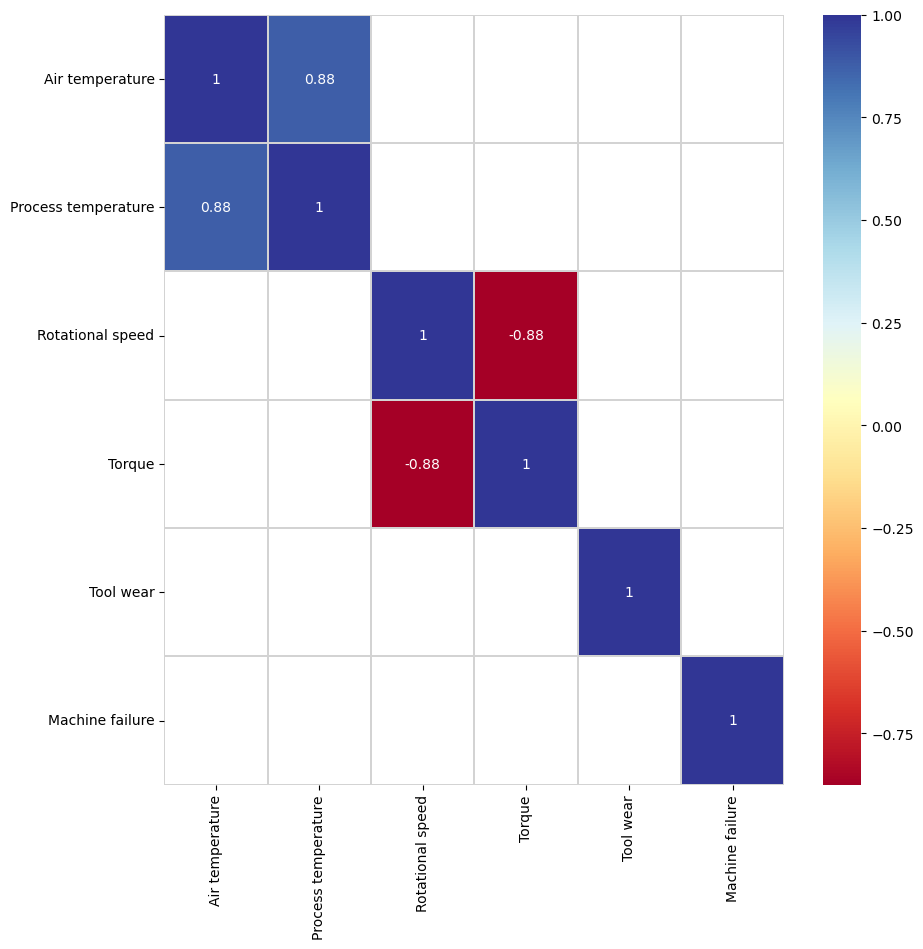

In [53]:
#correlation checking

plt.figure(figsize=(10,10))
threshold = 0.7 # using threashold to filter identify strong correlation 
df_corr = df.select_dtypes(include=[np.number]).corr()
corr_filter = df_corr.where((abs(df_corr)>= threshold)).isna()
sns.heatmap(df_corr,cmap='RdYlBu',mask=corr_filter,annot=True,linewidths=0.2,linecolor='lightgrey')

In [54]:
list(df)

['Type',
 'Air temperature',
 'Process temperature',
 'Rotational speed',
 'Torque',
 'Tool wear',
 'Machine failure']

In [16]:
%%time
profile = ProfileReport(df,
                        title="Predictive Maintenance",
                        dataset={"description": "This profiling report was generated for Kasun Wijethunga",
                                 "copyright_holder": "Kasun Wijethunga",
                                 "copyright_year": "2023",
                                },
                        explorative=True,
                       )
profile

CPU times: user 20.4 ms, sys: 173 µs, total: 20.6 ms
Wall time: 20.4 ms


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 10000 non-null  object 
 1   Air temperature      10000 non-null  float64
 2   Process temperature  10000 non-null  float64
 3   Rotational speed     10000 non-null  float64
 4   Torque               10000 non-null  float64
 5   Tool wear            10000 non-null  float64
 6   Machine failure      10000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 547.0+ KB


In [57]:
failure_count = df.value_counts(['Machine failure'])

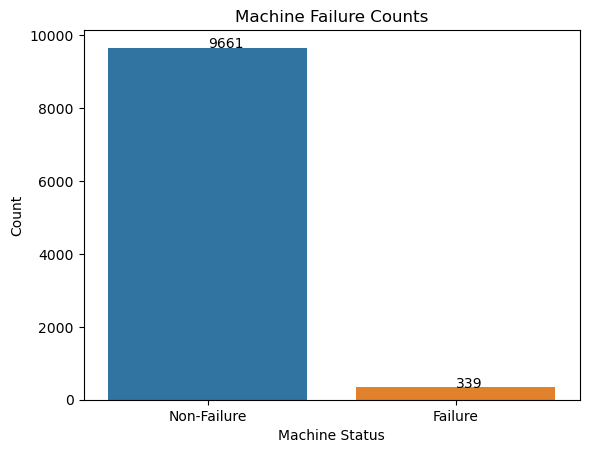

In [82]:
Failure_stautes  = ['Non-Failure', 'Failure']

sns.barplot(x=Failure_stautes, y=failure_count)

# Adding title
plt.title('Machine Failure Counts')

# Adding x and y labels
plt.xlabel('Machine Status')
plt.ylabel('Count')

# Adding annotations
for index, value in enumerate(failure_count):
    plt.text(index, value, str(value))

plt.show()

In [68]:
Type_qty  = df['Type'].value_counts()
print(Type_qty)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


In [101]:
# creating a new column called Power 
df['Power']=df['Rotational speed']*df['Torque']


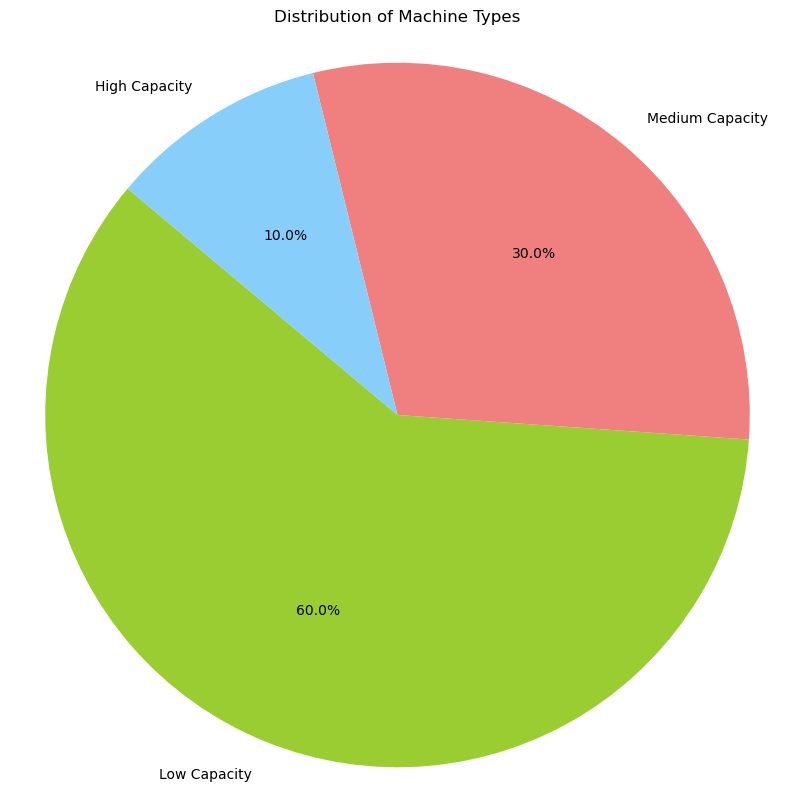

In [73]:
plt.figure(figsize=(10,10))
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
labels = 'Low Capacity', 'Medium Capacity', 'High Capacity', 
plt.pie(Type_qty, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Machine Types')
plt.show()

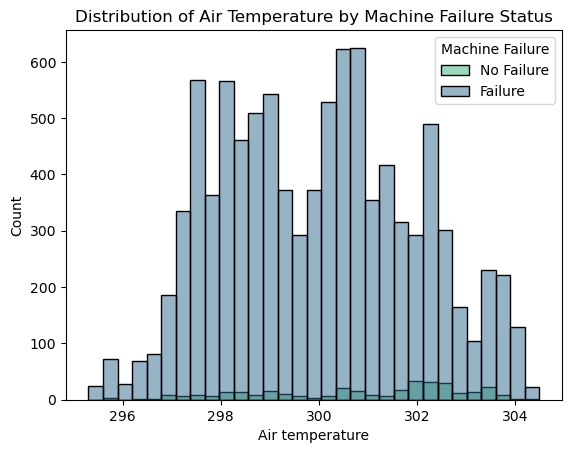

In [90]:
# anaylsis of Air temperature vs Machine failure

sns.histplot(df, x=df['Air temperature'], hue=df['Machine failure'],palette='viridis',legend=False)
plt.title('Distribution of Air Temperature by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])


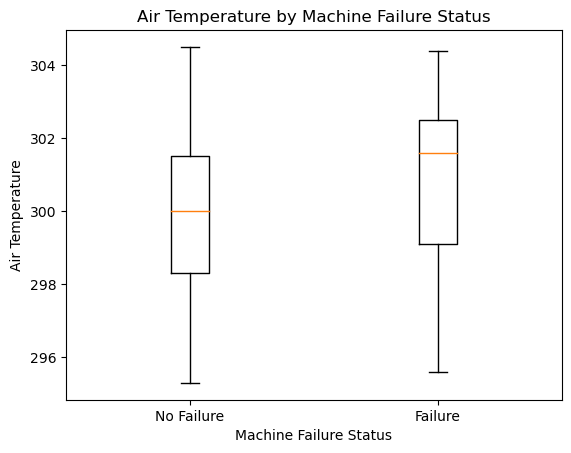

In [95]:
temp_failure = df[df['Machine failure'] == 1]['Air temperature']
temp_no_failure = df[df['Machine failure'] == 0]['Air temperature']

# Create the boxplot
plt.boxplot([temp_no_failure, temp_failure], labels=['No Failure', 'Failure'])
colors = ['blue', 'red']
plt.title('Air Temperature by Machine Failure Status')
plt.xlabel('Machine Failure Status')
plt.ylabel('Air Temperature')
plt.show()

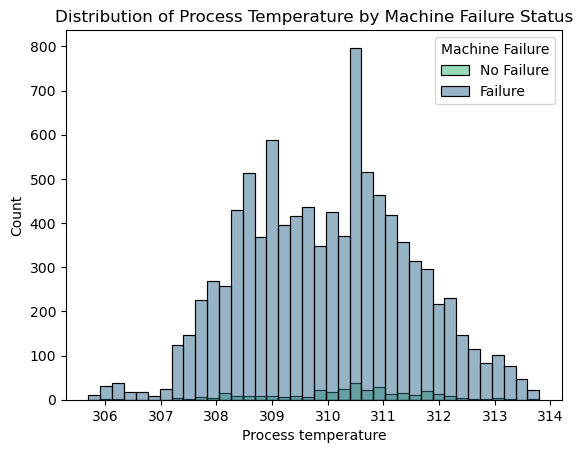

In [96]:
#process temp vs machine failure
sns.histplot(df, x=df['Process temperature'], hue=df['Machine failure'],palette='viridis',legend=False)
plt.title('Distribution of Process Temperature by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

In [98]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Machine failure'],
      dtype='object')

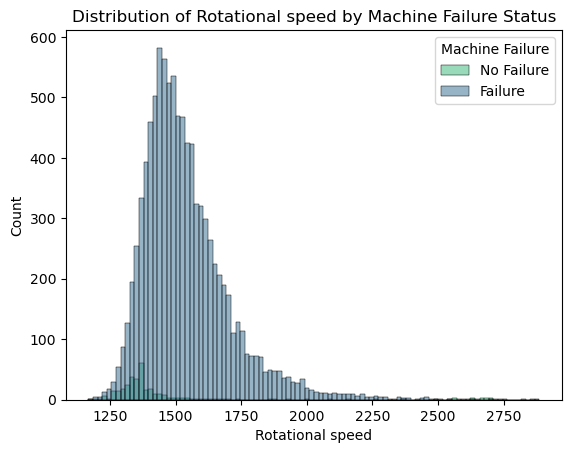

In [99]:
#rotational speed vs machine failure
sns.histplot(df, x=df['Rotational speed'], hue=df['Machine failure'],palette='viridis',legend=False)
plt.title('Distribution of Rotational speed by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

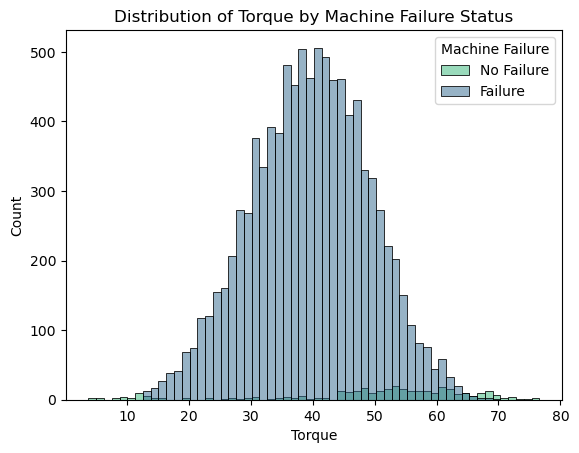

In [100]:
#Torque vs machine failure
sns.histplot(df, x=df['Torque'], hue=df['Machine failure'],palette='viridis',legend=False)
plt.title('Distribution of Torque by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

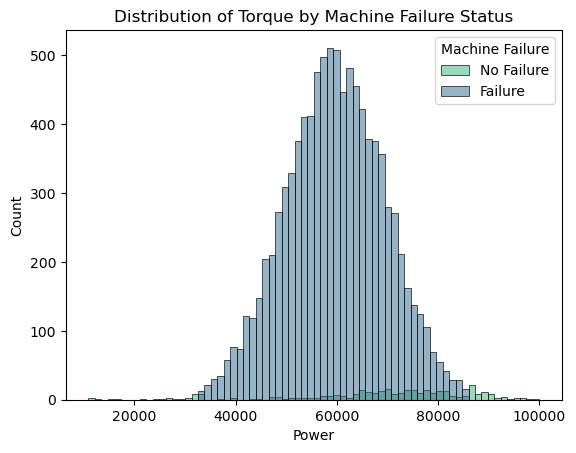

In [102]:
#Power vs machine failure
sns.histplot(df, x=df['Power'], hue=df['Machine failure'],palette='viridis',legend=False)
plt.title('Distribution of Torque by Machine Failure Status')

plt.legend(title='Machine Failure', loc='upper right', labels=['No Failure', 'Failure'])

### Preprocessing and Feature Selection  ###

In [26]:
df.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [21]:
#dropping Type column 
df.drop(['Type'],axis=1,inplace=True)

In [29]:
df.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power
0,298.1,308.6,1551.0,42.8,0.0,0.0,66382.8
1,298.2,308.7,1408.0,46.3,3.0,0.0,65190.4
2,298.1,308.5,1498.0,49.4,5.0,0.0,74001.2
3,298.2,308.6,1433.0,39.5,7.0,0.0,56603.5
4,298.2,308.7,1408.0,40.0,9.0,0.0,56320.0
